1. Преобразуйте данные
- проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
- закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. Сформулируйте выводы по проделанной работе:
- как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [4]:
# удаляем столбцы, которые не несут в себе полезной информации
data.drop(["name", "dob", "id"], axis=1, inplace=True)

In [5]:
# преобразуем пол в бинарный вид
se = LabelEncoder()
se.fit(data["sex"])
data["sex"] = data["sex"].apply(lambda x: se.transform([x])[0])
# data.head()

In [6]:
# преобразуем национальность и вид спорта в классы
categorical = ['nationality', 'sport']
data = pd.get_dummies(data, columns=categorical)

In [7]:
data.dropna(inplace=True)
data.describe()

,sex,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
count,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,...,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000
mean,0.539878,1.766942,72.070915,0.059772,0.058482,0.058574,0.000276,0.000553,0.005526,0.000460,...,0.027261,0.034260,0.034997,0.015472,0.011512,0.017591,0.010039,0.035181,0.023761,0.032142
std,0.498430,0.113111,16.162358,0.260756,0.242387,0.239113,0.016621,0.023502,0.074134,0.021455,...,0.162851,0.181906,0.183781,0.123428,0.106681,0.131464,0.099694,0.184247,0.152312,0.176386
min,0.000000,1.210000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.690000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.760000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.840000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.210000,170.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# будем предсказывать наличие медали
data["medal"] = data["gold"] + data["silver"] + data["bronze"]
data["medal"] = data["medal"].apply(lambda x: 1 if x > 0 else 0)
data.drop(["gold", "silver", "bronze"], axis=1, inplace=True)

In [9]:
# разделяем данные на обучающую и тестовую выборки
Y = data["medal"]
X = data.drop(["medal"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
# нормализуем данные
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-1.08160649, -0.3207613 , -1.23289068, ..., -0.19205914,
        -0.15586036, -0.18782996],
       [ 0.92455067,  1.35428604,  0.60930857, ..., -0.19205914,
        -0.15586036, -0.18782996],
       [ 0.92455067, -0.40892169,  0.79352849, ..., -0.19205914,
        -0.15586036, -0.18782996],
       ...,
       [-1.08160649, -0.14444053, -0.49601098, ..., -0.19205914,
        -0.15586036, -0.18782996],
       [-1.08160649,  0.2963614 , -0.31179106, ..., -0.19205914,
        -0.15586036, -0.18782996],
       [-1.08160649, -0.58524246, -0.92585747, ..., -0.19205914,
        -0.15586036, -0.18782996]])

In [11]:
# обучаем модель
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Text(0.5, 0, 'FPR')

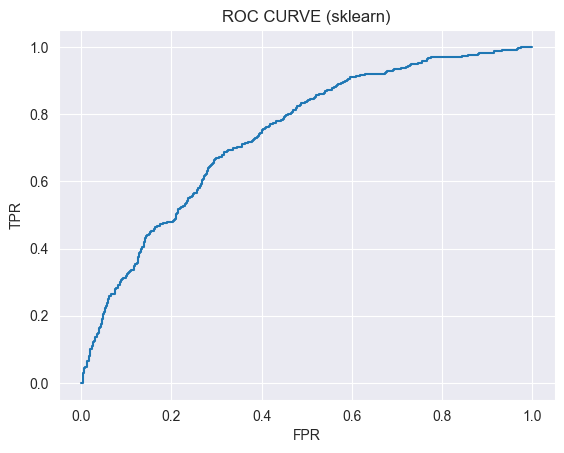

In [41]:
# roc-кривая
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred = model.predict_proba(X_test)[:, 1]
fpr_skl, tpr_skl, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr_skl, tpr_skl)
plt.title('ROC CURVE (sklearn)')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [17]:
# roc-auc-score
roc_auc_score(Y_test, Y_pred)

0.7385884228599461

In [30]:
# подсчет метрик TPR, FPR «вручную»
def tpr_fpr(y_true, y_pred, threshold=0.5):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] >= threshold:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] >= threshold:
            fp += 1
        elif y_true[i] == 0 and y_pred[i] < threshold:
            tn += 1
        elif y_true[i] == 1 and y_pred[i] < threshold:
            fn += 1

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

Text(0.5, 0, 'FPR_manual')

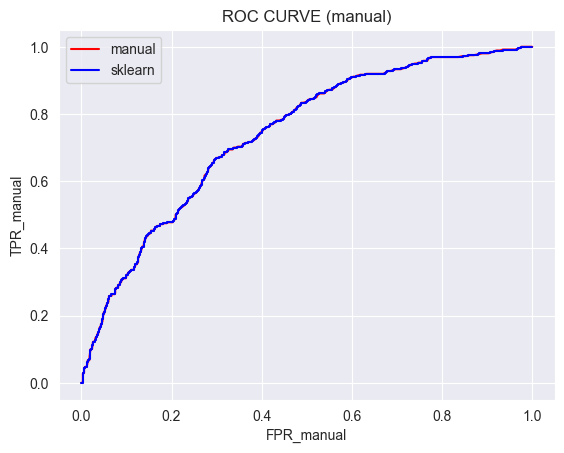

In [70]:
# просчитаем fpr и tpr для разных порогов
tpr_list = []
fpr_list = []
for i in range(0, 1000, 1):
    tpr, fpr = tpr_fpr(Y_test.values, Y_pred, i/1000)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
plt.plot(fpr_list, tpr_list, color='red', label='manual')
plt.plot(fpr_skl, tpr_skl, color='blue', label='sklearn')
plt.legend()
plt.title('ROC CURVE (manual)')
plt.ylabel('TPR_manual')
plt.xlabel('FPR_manual')

In [71]:
# roc-auc-score «вручную»
def roc_auc(tpr_list, fpr_list):
    auc = 0
    for i in range(len(tpr_list) - 1):
        auc += (tpr_list[i] + tpr_list[i + 1]) * (fpr_list[i] - fpr_list[i + 1]) / 2
    return auc
roc_auc(tpr_list, fpr_list)

0.7385546970811868

## ВЫВОД
Графики похожи, можно заключить, что параметры посчитанные вручную - верные.
Также можно отменить, что roc-auc-score посчитанный вручную близок к результату, из библиотеки.

In [66]:
# precision-recall
def precision_recall(y_true, y_pred, threshold=0.5):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] >= threshold:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] >= threshold:
            fp += 1
        elif y_true[i] == 0 and y_pred[i] < threshold:
            tn += 1
        elif y_true[i] == 1 and y_pred[i] < threshold:
            fn += 1
    print(tp, fp, tn, fn)
    precision = tp / (tp + fp + 1)
    recall = tp / (tp + fn + 1)
    return precision, recall

360 1812 0 0
308 949 863 52
224 503 1309 136
135 230 1582 225
84 102 1710 276
17 21 1791 343
10 8 1804 350
3 6 1806 357
0 1 1811 360
0 0 1812 360


Text(0.5, 0, 'Recall')

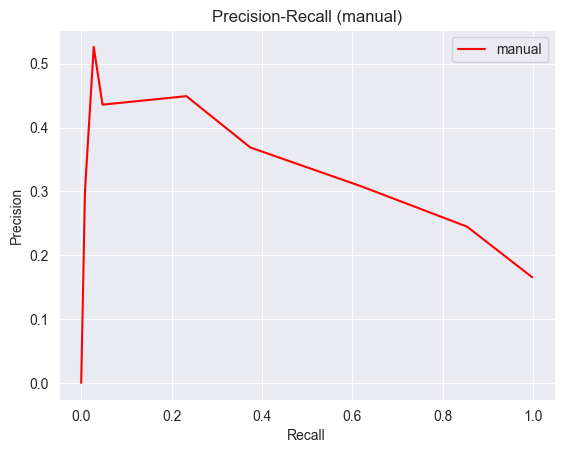

In [69]:
precision_list = []
recall_list = []
for i in range(0, 10, 1):
    precision, recall = precision_recall(Y_test.values, Y_pred, i/10)
    precision_list.append(precision)
    recall_list.append(recall)
plt.plot(recall_list, precision_list, color='red', label='manual')
plt.legend()
plt.title('Precision-Recall (manual)')
plt.ylabel('Precision')
plt.xlabel('Recall')